# Projet analyse de donnée

Voici mon projet d’analyse de données portant sur l’étude morphologique de graines de citrouille, en utilisant le Pumpkin Seeds Dataset. Ce jeu de données contient plusieurs variables quantitatives décrivant la forme, la taille et les caractéristiques géométriques de différentes variétés de graines.

L’objectif principal de cette projet est d’explorer la structure des données à travers une Analyse en Composantes Principales (ACP). Cette méthode permet de réduire la dimensionnalité tout en conservant l’essentiel de l’information. Elle facilite également la visualisation et la détection de regroupements ou de similarités entre les différentes graines.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

## 1) Importation de jeu de donnée

In [72]:
datasets = pd.read_excel('../dataset/Seeds_Dataset.xlsx', sheet_name='Pumpkin_Seeds_Dataset')

## Dimention de donnée

In [73]:
datasets.shape

(2500, 13)

## Information pour chaque variables

In [74]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [ ]:
datasets.head(20)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


## 2) A propos de donnée:
Notre donnée contient 2500 lignes et 13 colonnes,dont les colonnes sont:
- ``Area`` :	Surface de la graine (en pixels²),
- ``Perimeter``:	Périmètre de la graine ,
- ``Equiv_Diameter`` : diamètre d’un cercle ayant la même surface que l’objet mesuré (la graine)
- ``Major_Axis_Length``:	Longueur de l’axe principal (longueur maximale) 
- ``Minor_Axis_Length``:	Longueur de l’axe secondaire (largeur)
- ``Eccentricity``:	Rapport entre les deux axes (forme)
- ``Convex_Area``:	Surface du plus petit polygone convexe qui contient la graine
- ``Extent``:	Ratio entre surface réelle et surface englobante (bounding box)
- ``Solidity``:	Rapport surface réelle / surface convexe
- ``Roundness``:	Indice de circularité
- ``Aspect_Ration``:	Ratio longueur / largeur
- ``Compactness``:	Compacité 
- ``Class``:	Type de graine de courge (ex : 'Çerçevelik', 'Ürgüp Sivrisi')

## 3) EDA :Analyse Exploratoire de Donnée

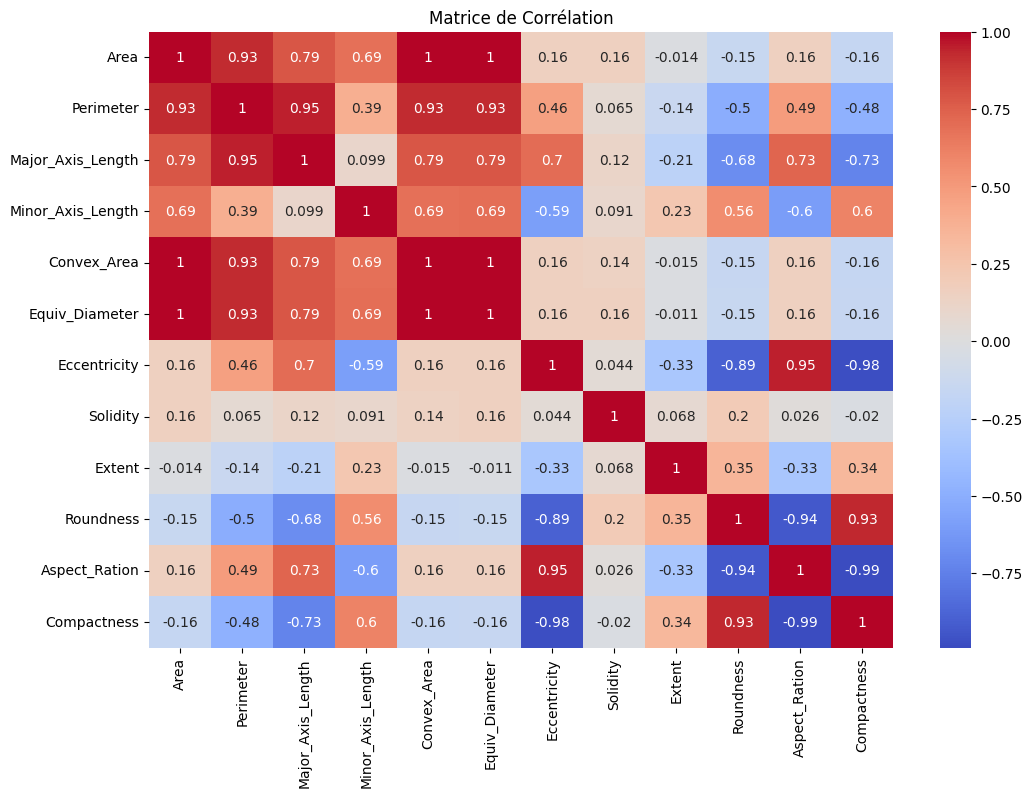

In [89]:
# Matrice de corrélation:pour visualiser les relations entre les variables
plt.figure(figsize=(12, 8))
sns.heatmap(datasets.drop(['Class'],axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

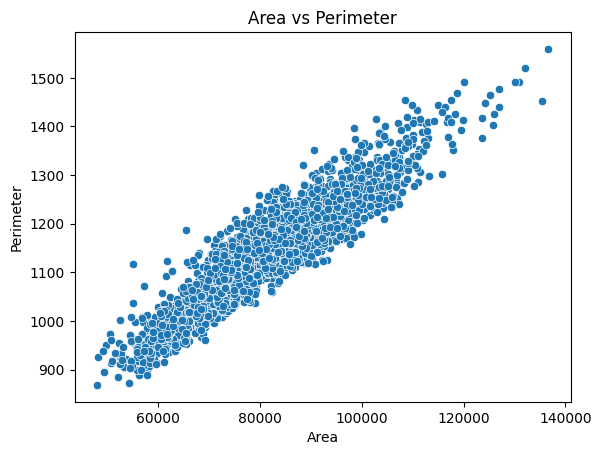

In [78]:
sns.scatterplot(x='Area', y='Perimeter', data=datasets)
plt.title('Area vs Perimeter')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

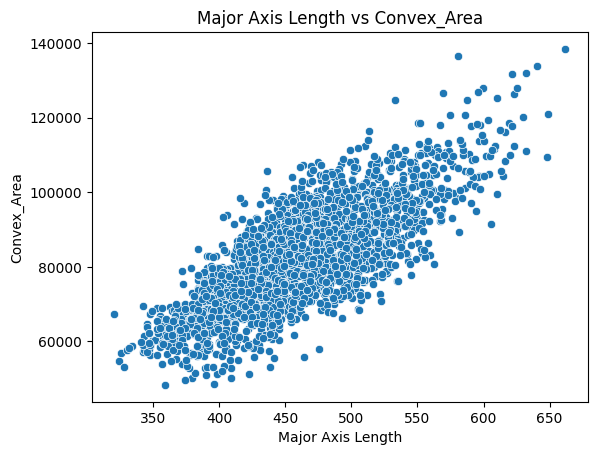

In [79]:
sns.scatterplot(x='Major_Axis_Length', y='Convex_Area', data=datasets)
plt.title('Major Axis Length vs Convex_Area')         
plt.xlabel('Major Axis Length')
plt.ylabel('Convex_Area')
plt.show()



### Interpretation:
- On trouve d'après le representation précedent que la plus part des variables sont corelés,
- il y des corelation positif (par exemples le variable Major Axis Length et Convex_Area)
- il y a aussi des corelation negatif (par example les variable Compactness et Aspect_Ration)

In [80]:
datasets.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

## 4) Normalisation de donnée :
Pour mettre toutes les variables sur une même échelle, pour qu’aucune variable ne domine les autres à cause de son unité ou de son ordre de grandeur.

- Ici je prefère utiliser la normalisation Min-Max pour metre tous les valeur entre 0 et 1 :
 $ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}} $

In [1]:
# Fontion pour normaliser les données
# Normalisation Min-Max

def normalize_data(data,column):
    min_val = data[column].min()
    max_val = data[column].max()
    data[column] = (data[column] - min_val) / (max_val - min_val)
    

### Nouveau donné après normatisation:

In [2]:
# Normalisation de donnée :
# Pour mettre toutes les variables sur une même échelle, pour qu’aucune variable ne domine les autres à cause de son unité ou de son ordre de grandeur.

data_new = datasets.copy()
for column in data_new.columns[:-1]:
    normalize_data(data_new, column)

NameError: name 'datasets' is not defined

### Application de l'analyse en composante principale de notre nouveau donné

In [ ]:

pca = PCA()
pca.fit(data_new.drop(columns=['Class']))     
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[5.35958961e-01 3.49788869e-01 9.29055091e-02 1.43482678e-02
 3.69187172e-03 2.35081827e-03 5.24594020e-04 3.19546124e-04
 8.59219891e-05 1.63606136e-05 8.87730342e-06 4.03713988e-07]


### Interpretation du resultat:
- Le premier axe porte  53.60% d'information 
- Le $2^{èm}$ axe porte  34.98% d'information
- Le $3^{èm}$ axe porte   9.29% d'information
- Le $4^{èm}$ axe porte   1.43% d'information
- Le $5^{èm}$ axe porte   0.37% d'information
- Le $6^{èm}$ axe porte   0.24% d'information
- Le $7^{èm}$ axe porte   0.05% d'information
- Le $8^{èm}$ axe porte   0.03% d'information
- Le $9^{èm}$ axe porte   0.01% d'information
- Le $10^{èm}$ axe porte   0.00% d'information
- Le $11^{èm}$ axe porte   0.00% d'information
- Le $12^{èm}$ axe porte   0.00% d'information

### Descision de nombre des axes utuliser par le Méthode du coude (Elbow method)
- ici si on utilise 2 exes principales on obtient 88,5% d'information c'est à dire 11,5% d'information perdu.Et si on utilise 3 exes principales on obtient 97,5% d'information c'est à dire 2,5% d'information perdu.

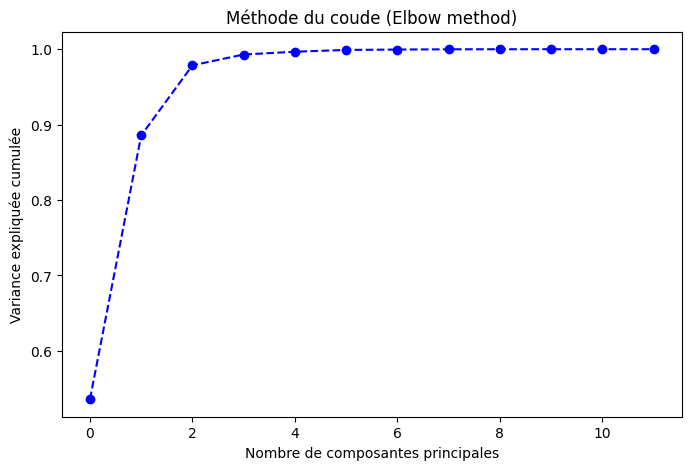

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(
    np.cumsum(explained_variance),
    marker='o', linestyle='--', color='b'
)
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Méthode du coude (Elbow method)")
plt.show()

In [ ]:
print(pca.components_[:3])

[[ 0.3467639   0.41345408  0.44049918  0.07451537  0.34419034  0.35497544
   0.17321839  0.01113637 -0.11086228 -0.25363713  0.28461458 -0.27746634]
 [ 0.2807995   0.11526075 -0.04009029  0.49203039  0.27813507  0.29027742
  -0.23350597  0.01879149  0.2153603   0.33963918 -0.38202181  0.37415465]
 [-0.0214012   0.01376721  0.06764787 -0.10603709 -0.02257899 -0.02081699
   0.0752803   0.01802602  0.96945016 -0.07602454  0.12902093 -0.11973887]]


## Si on utilise 2 axes:ACP

In [102]:
X = datasets.drop(columns=["Class"])
y = datasets["Class"]


for column in X.columns:
    normalize_data(X, column)

# ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.components_)

[[ 0.3467639   0.41345408  0.44049918  0.07451537  0.34419034  0.35497544
   0.17321839  0.01113637 -0.11086228 -0.25363713  0.28461458 -0.27746634]
 [ 0.2807995   0.11526075 -0.04009029  0.49203039  0.27813507  0.29027742
  -0.23350597  0.01879149  0.2153603   0.33963918 -0.38202181  0.37415465]]


### interpretation de resultat
- Notre axes ici est de coordonnée: 
- PC1 = ( 0.3467639, 0.41345408,0.44049918, 0.07451537, 0.34419034, 0.35497544, 0.17321839, 0.01113637, -0.11086228, -0.25363713, 0.28461458, -0.27746634 ) et 
- PC2 = (0.280799,  0.11526075, -0.04009029, 0.49203039, 0.27813507 , 0.29027742, -0.23350597,  0.01879149,  0.2153603,  0.33963918, -0.38202181, 0.37415465)

### Visualisation de resultat :

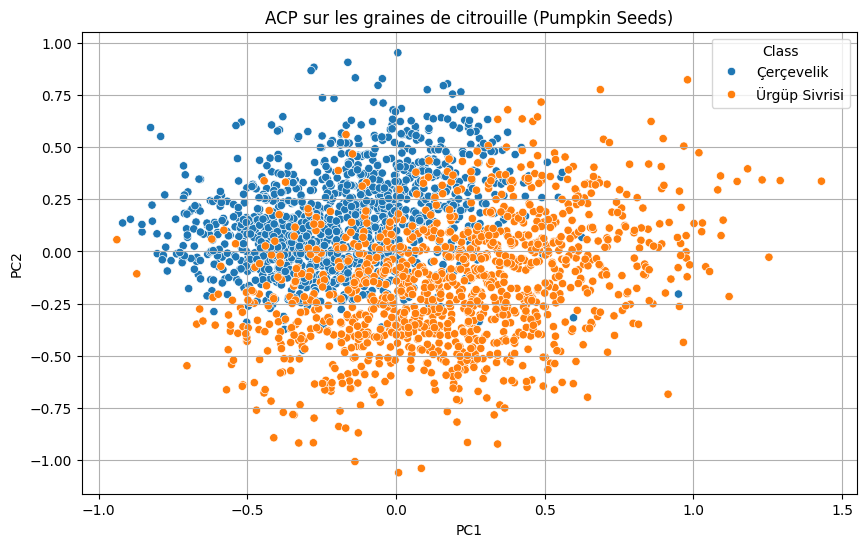

In [ ]:


# Visualisation
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('ACP sur les graines de citrouille (Pumpkin Seeds)')
plt.grid()
plt.show()


### Si on utilise 3 axes:ACP

In [104]:
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X)

pca_df_3 = pd.DataFrame(X_pca_3, columns=['PC1', 'PC2', 'PC3']).dropna()
pca_df_3['Class'] = y.dropna()

print(pca_3.components_)

[[ 0.3467639   0.41345408  0.44049918  0.07451537  0.34419034  0.35497544
   0.17321839  0.01113637 -0.11086228 -0.25363713  0.28461458 -0.27746634]
 [ 0.2807995   0.11526075 -0.04009029  0.49203039  0.27813507  0.29027742
  -0.23350597  0.01879149  0.2153603   0.33963918 -0.38202181  0.37415465]
 [-0.0214012   0.01376721  0.06764787 -0.10603709 -0.02257899 -0.02081699
   0.0752803   0.01802602  0.96945016 -0.07602454  0.12902093 -0.11973887]]


### interpretation de resultat
- Notre axes ici est de coordonnée: 
- PC1 = ( 0.3467639, 0.41345408,0.44049918, 0.07451537, 0.34419034, 0.35497544, 0.17321839, 0.01113637, -0.11086228, -0.25363713, 0.28461458, -0.27746634 ) ;
- PC2 = (0.280799,  0.11526075, -0.04009029, 0.49203039, 0.27813507 , 0.29027742, -0.23350597,  0.01879149,  0.2153603,  0.33963918, -0.38202181, 0.37415465) ,et
- PC3 = (-0.0214012, 0.01376721, 0.06764787, -0.10603709, -0.02257899, -0.02081699, 0.0752803, 0.01802602, 0.96945016, -0.07602454, 0.12902093, -0.11973887)

### Visualisation de resultat:

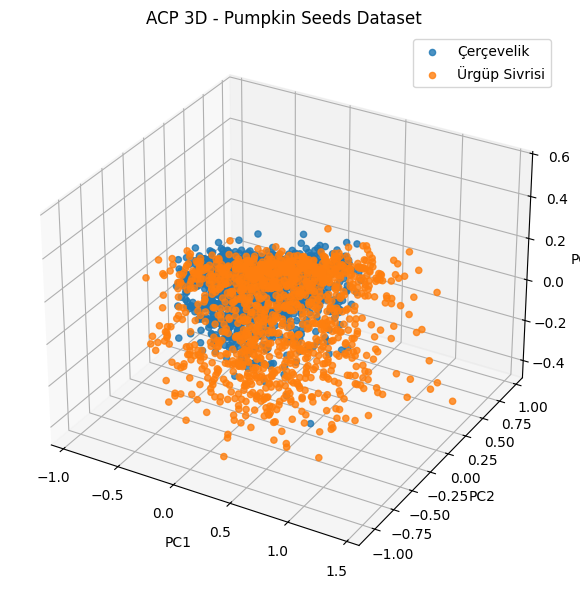

In [ ]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Mapper les couleurs selon la classe
classes = pca_df_3['Class'].unique()
colors = sns.color_palette("tab10", len(classes))
for cls, color in zip(classes, colors):
    indices = pca_df_3['Class'] == cls
    ax.scatter(
        pca_df_3.loc[indices, 'PC1'],
        pca_df_3.loc[indices, 'PC2'],
        pca_df_3.loc[indices, 'PC3'],
        label=cls,
        color=color,
        s=20,
        alpha=0.8
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('ACP 3D - Pumpkin Seeds Dataset')
ax.legend()
plt.tight_layout()

# ax.view_init(elev=30, azim=-10)
plt.show()



## Conclusion: